(0d-nb)=
# 0D tight-binding model of NH3 molecule

In [1]:
from pythtb import TBModel  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
# define coordinates of orbitals
sq32 = np.sqrt(3)/2
orb = [
    [(2.0 / 3.0) * sq32, 0.0, 0.0],
    [(-1.0 / 3.0) * sq32, 1.0 / 2.0, 0.0],
    [(-1.0 / 3.0) * sq32, -1.0 / 2.0, 0.0],
    [0.0, 0.0, 1.0],
]

In [3]:
# make zero dimensional tight-binding model
my_model = TBModel(0, 3, lat, orb)

# set model parameters
delta = 0.5
t_first = 1.0

# change on-site energies so that N and H don't have the same energy
my_model.set_onsite([-delta, -delta, -delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j)
my_model.set_hop(t_first, 0, 1)
my_model.set_hop(t_first, 0, 2)
my_model.set_hop(t_first, 0, 3)
my_model.set_hop(t_first, 1, 2)
my_model.set_hop(t_first, 1, 3)
my_model.set_hop(t_first, 2, 3)

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 0
number of spin components   = 1
periodic directions         = []
number of orbitals          = 4
number of electronic states = 4

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ,    0   ]
  # 1 ===> [   0   ,  1.000 ,    0   ]
  # 2 ===> [   0   ,    0   ,  1.000 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.577 ,    0   ,    0   ]
  # 1 ===> [-0.289 ,  0.500 ,    0   ]
  # 2 ===> [-0.289 , -0.500 ,    0   ]
  # 3 ===> [   0   ,    0   ,  1.000 ]
Site energies:
  # 0 ===> -0.500 
  # 1 ===> -0.500 
  # 2 ===> -0.500 
  # 3 ===>  0.500 
Hoppings:
  < 0 | H | 11.0000 
  < 0 | H | 21.0000 
  < 0 | H | 31.0000 
  < 1 | H | 21.0000 
  < 1 | H | 31.0000 
  < 2 | H | 31.0000 
Hopping distances:
  | pos(0) - pos(1) | =  1.000 
  | pos(0) - pos(2) | =  1.000 
  | pos(0) - pos(3) | =  1.155 
  | po

Solve for the eigenenergies of the Hamiltonian

In [4]:
evals = my_model.solve_ham()

Text(0, 0.5, 'Energy')

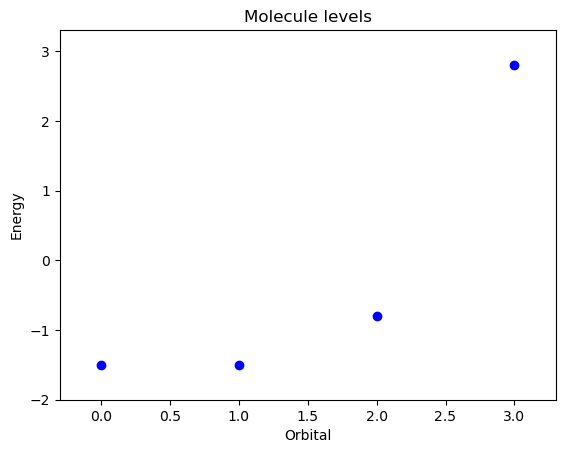

In [5]:
fig, ax = plt.subplots()
ax.plot(evals, "bo")
ax.set_xlim(-0.3, 3.3)
ax.set_ylim(evals.min() - 0.5, evals.max() + 0.5)
ax.set_title("Molecule levels")
ax.set_xlabel("Orbital")
ax.set_ylabel("Energy")